In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud

plt.rcParams['figure.figsize']=(6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats={'png','retina'}
%matplotlib inline

In [2]:
anime=pd.read_csv('./datasets/anime.csv')
user=pd.read_csv('./datasets/rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
user.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
print(anime.shape)
print(user.shape)

(12294, 7)
(7813737, 3)


## 找到每個用戶評分的平均值。
## 如果評分高於用戶的動漫評分將分配喜歡

In [6]:
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [7]:
user[user['user_id']==2].rating.mean()

2.6666666666666665

In [8]:
user[user['user_id']==5].rating.mean()

4.263383297644539

## 計算每個用戶的平均評分(MRPU)

In [9]:
mrpu=user.groupby(['user_id']).mean().reset_index()
mrpu['mean_rating']=mrpu['rating']

mrpu.drop(['anime_id','rating'],axis=1,inplace=True)

In [10]:
mrpu.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [11]:
user=pd.merge(user,mrpu,on=['user_id','user_id'])

In [12]:
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [13]:
user=user.drop(user[user.rating < user.mean_rating].index)

In [14]:
user[user['user_id']==1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [15]:
user[user['user_id']==2].head(10)

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [16]:
print(user.shape)

(4262566, 4)


In [17]:
user['user_id'].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516], dtype=int64)

In [18]:
user=user.rename({'rating':'userRating'},axis='columns')

## 合併兩資料集

In [19]:
mergedata=pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata=mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [20]:
len(mergedata['anime_id'].unique())

7852

## 創Crosstable

In [21]:
user_anime=pd.crosstab(mergedata['user_id'],mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
user_anime.shape

(20000, 7852)

## Principal component analysis(PCA)

In [23]:
pca=PCA(n_components=3)
pca.fit(user_anime)
pca_samples=pca.transform(user_anime)

In [24]:
ps=pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415762
1,-1.773553,-0.272593,0.116388
2,0.218814,-1.232282,-0.985793
3,0.199435,-0.291005,0.681061
4,3.532125,-0.184796,-0.743297


In [25]:
tocluster = pd.DataFrame(ps[[0,1,2]])

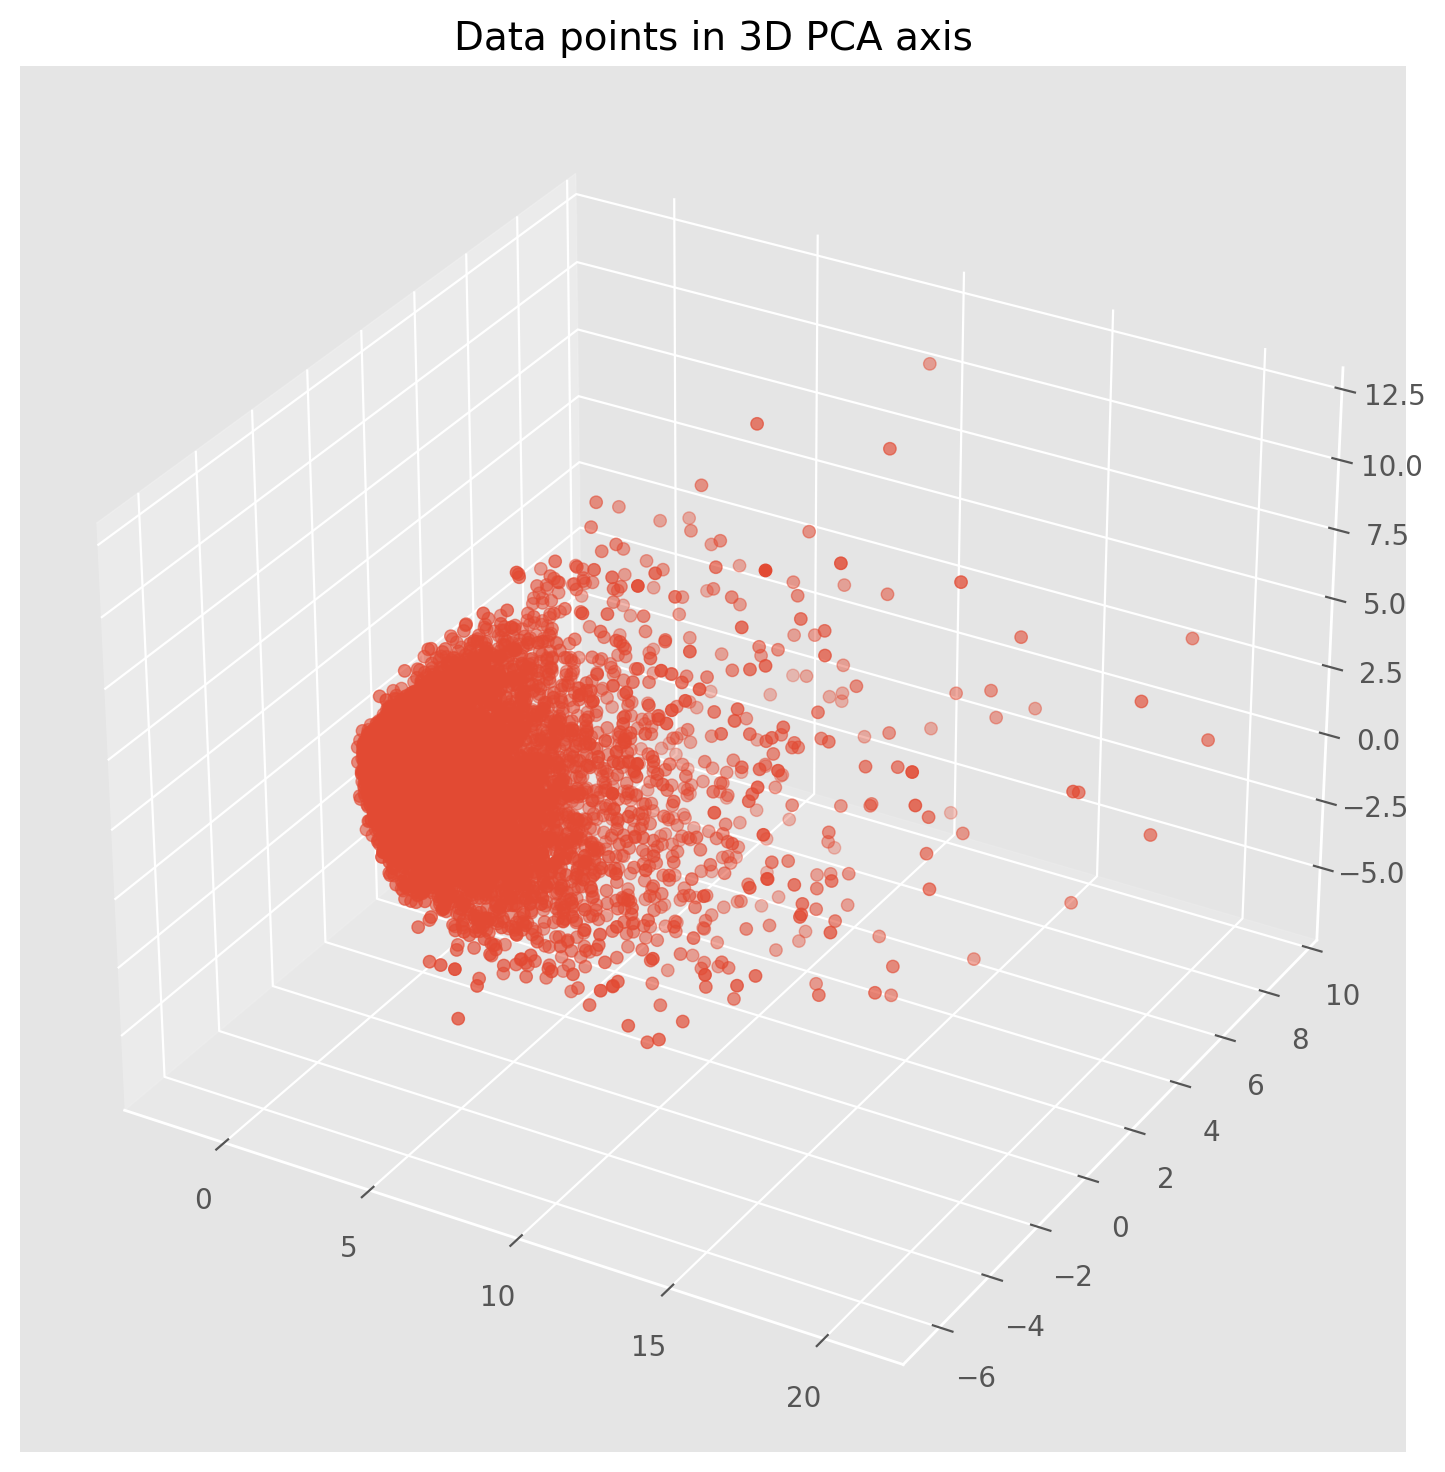

In [26]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax=plt.axes(projection="3d")
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=14)
plt.show()

## 選擇k數

In [27]:
scores=[]
inertia_list=np.empty(8)

for i in range(2,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i]=kmeans.inertia_
    scores.append(silhouette_score(tocluster,kmeans.labels_))

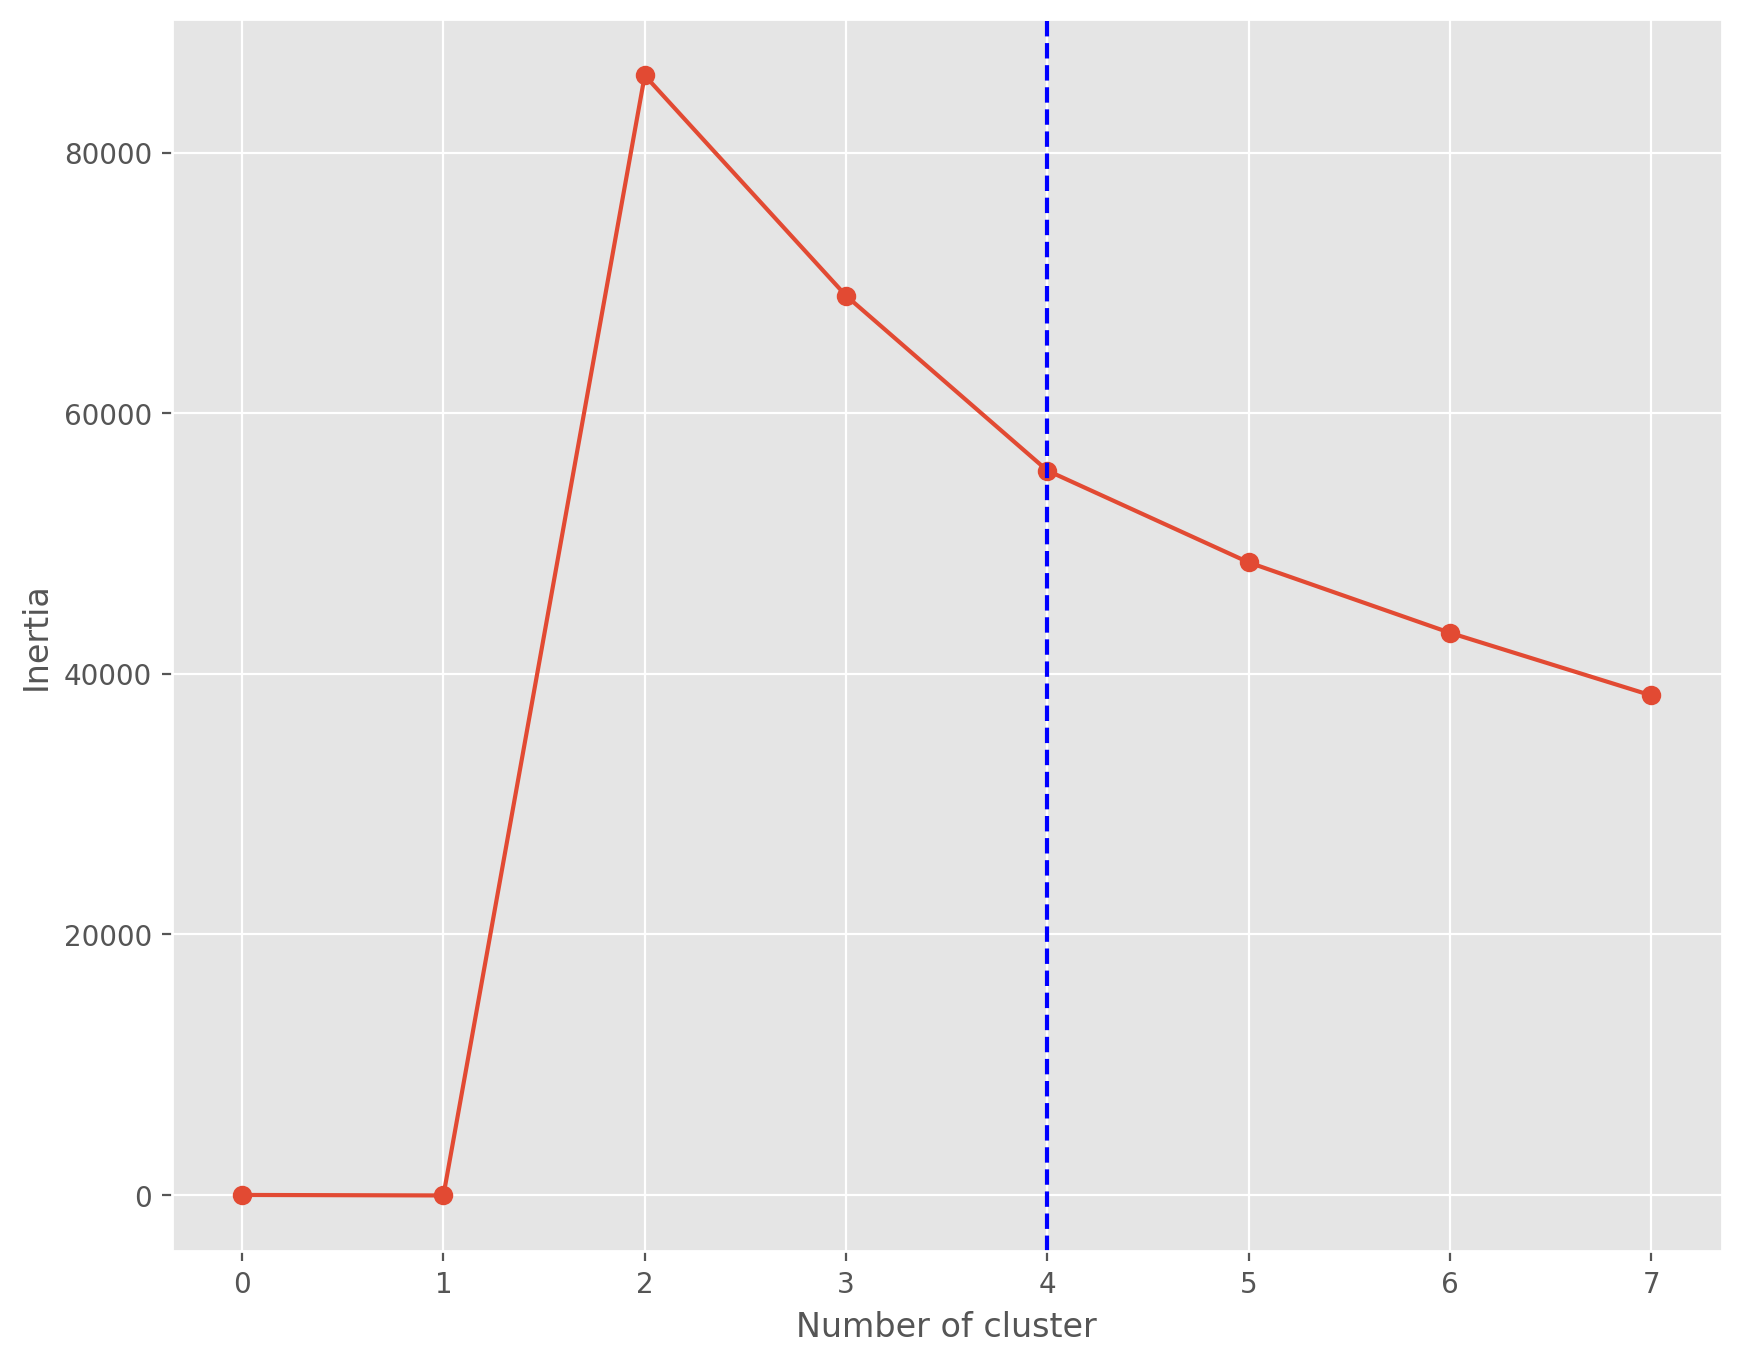

In [28]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=4,color='blue',linestyle='--')
plt.show()

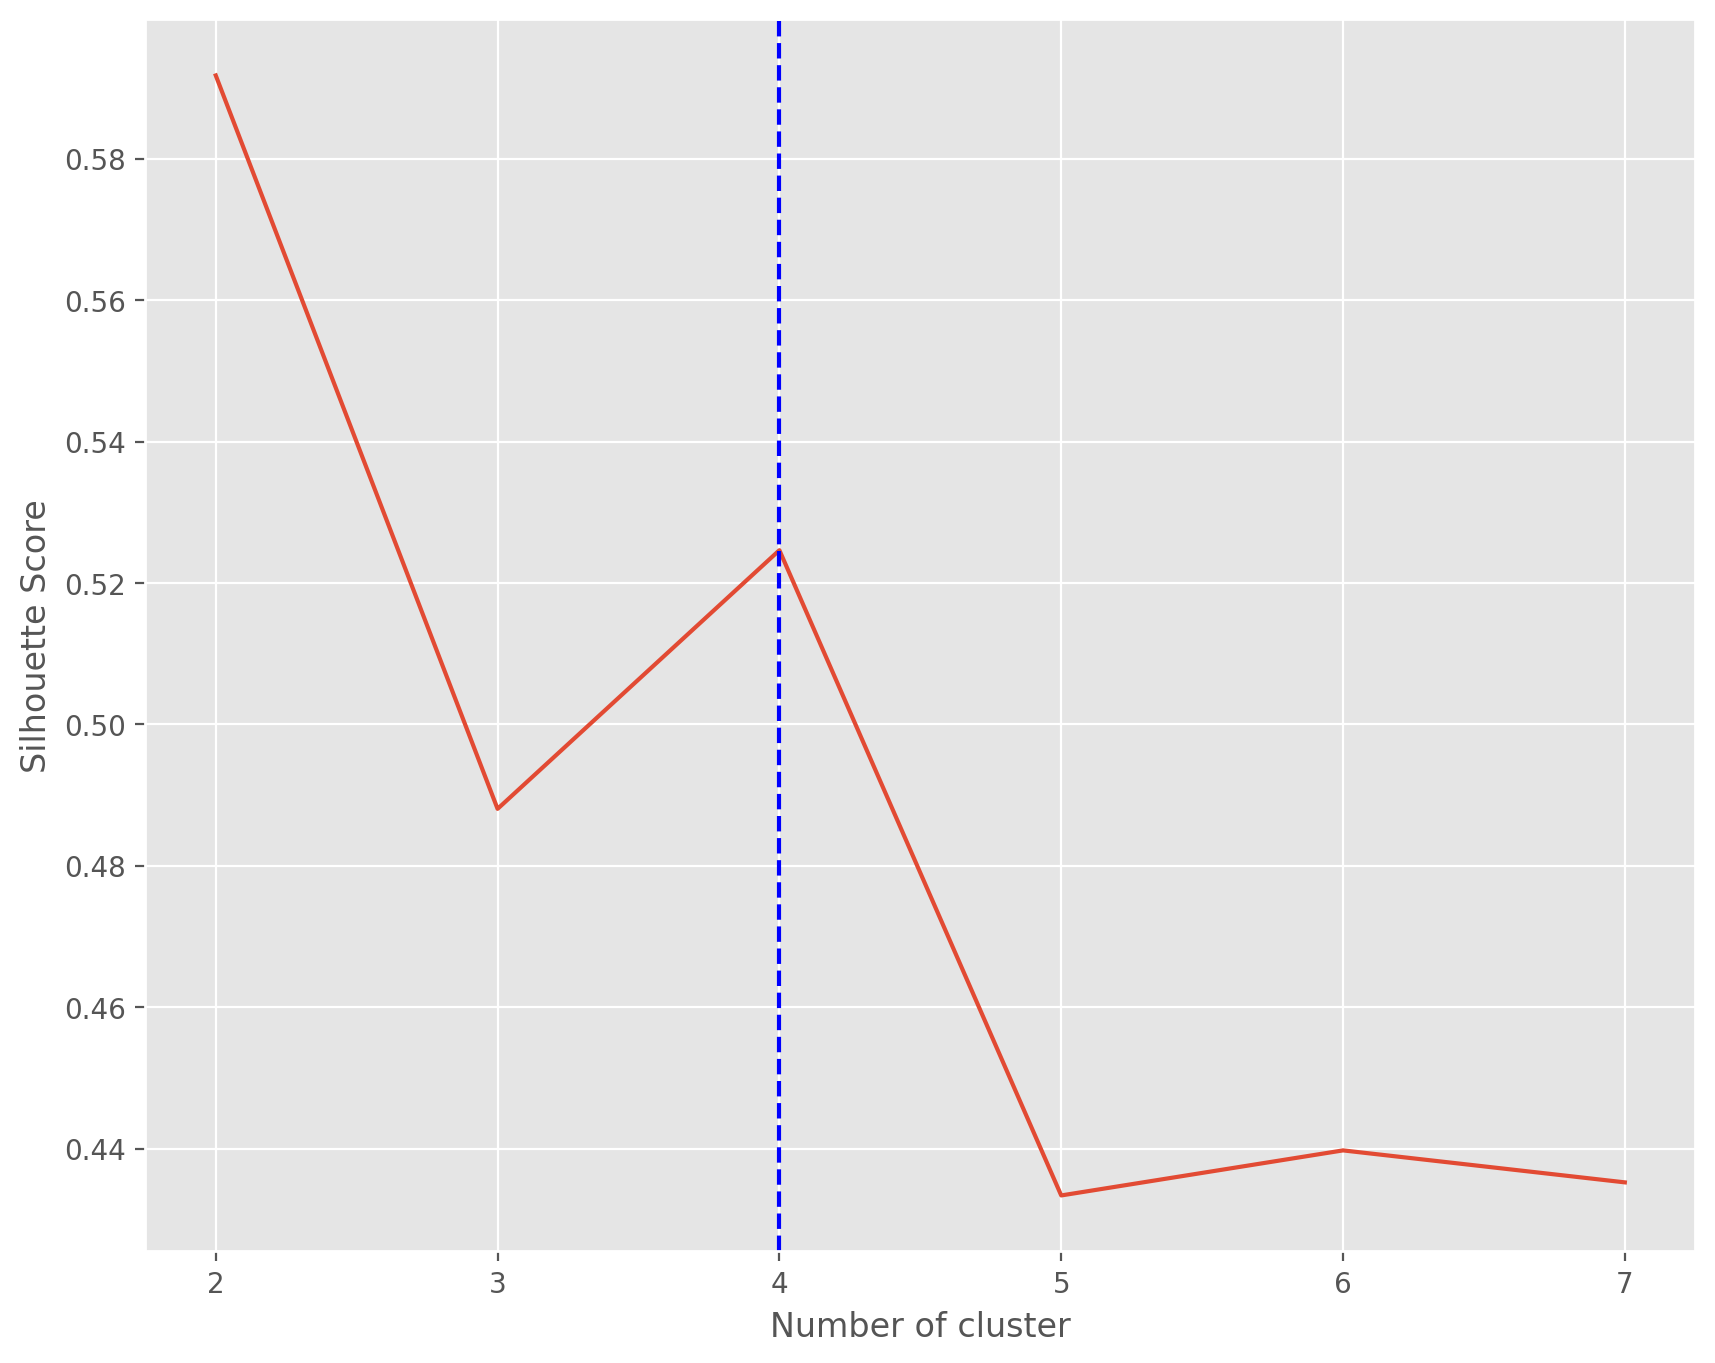

In [29]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(2,8),scores)
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette Score')
plt.axvline(x=4, color='blue', linestyle='--')
plt.show()

## K means clustering

In [30]:
cluster=KMeans(n_clusters=4,random_state=30).fit(tocluster)
cluster_centers=cluster.cluster_centers_
cluster_preds=cluster.predict(tocluster)

print(cluster_centers)

[[-1.08874971 -0.04026584  0.06666461]
 [ 7.61700382 -0.64256856  0.83955844]
 [ 1.6784451   2.31533839 -0.02522634]
 [ 1.97875213 -1.12654216 -0.43514828]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


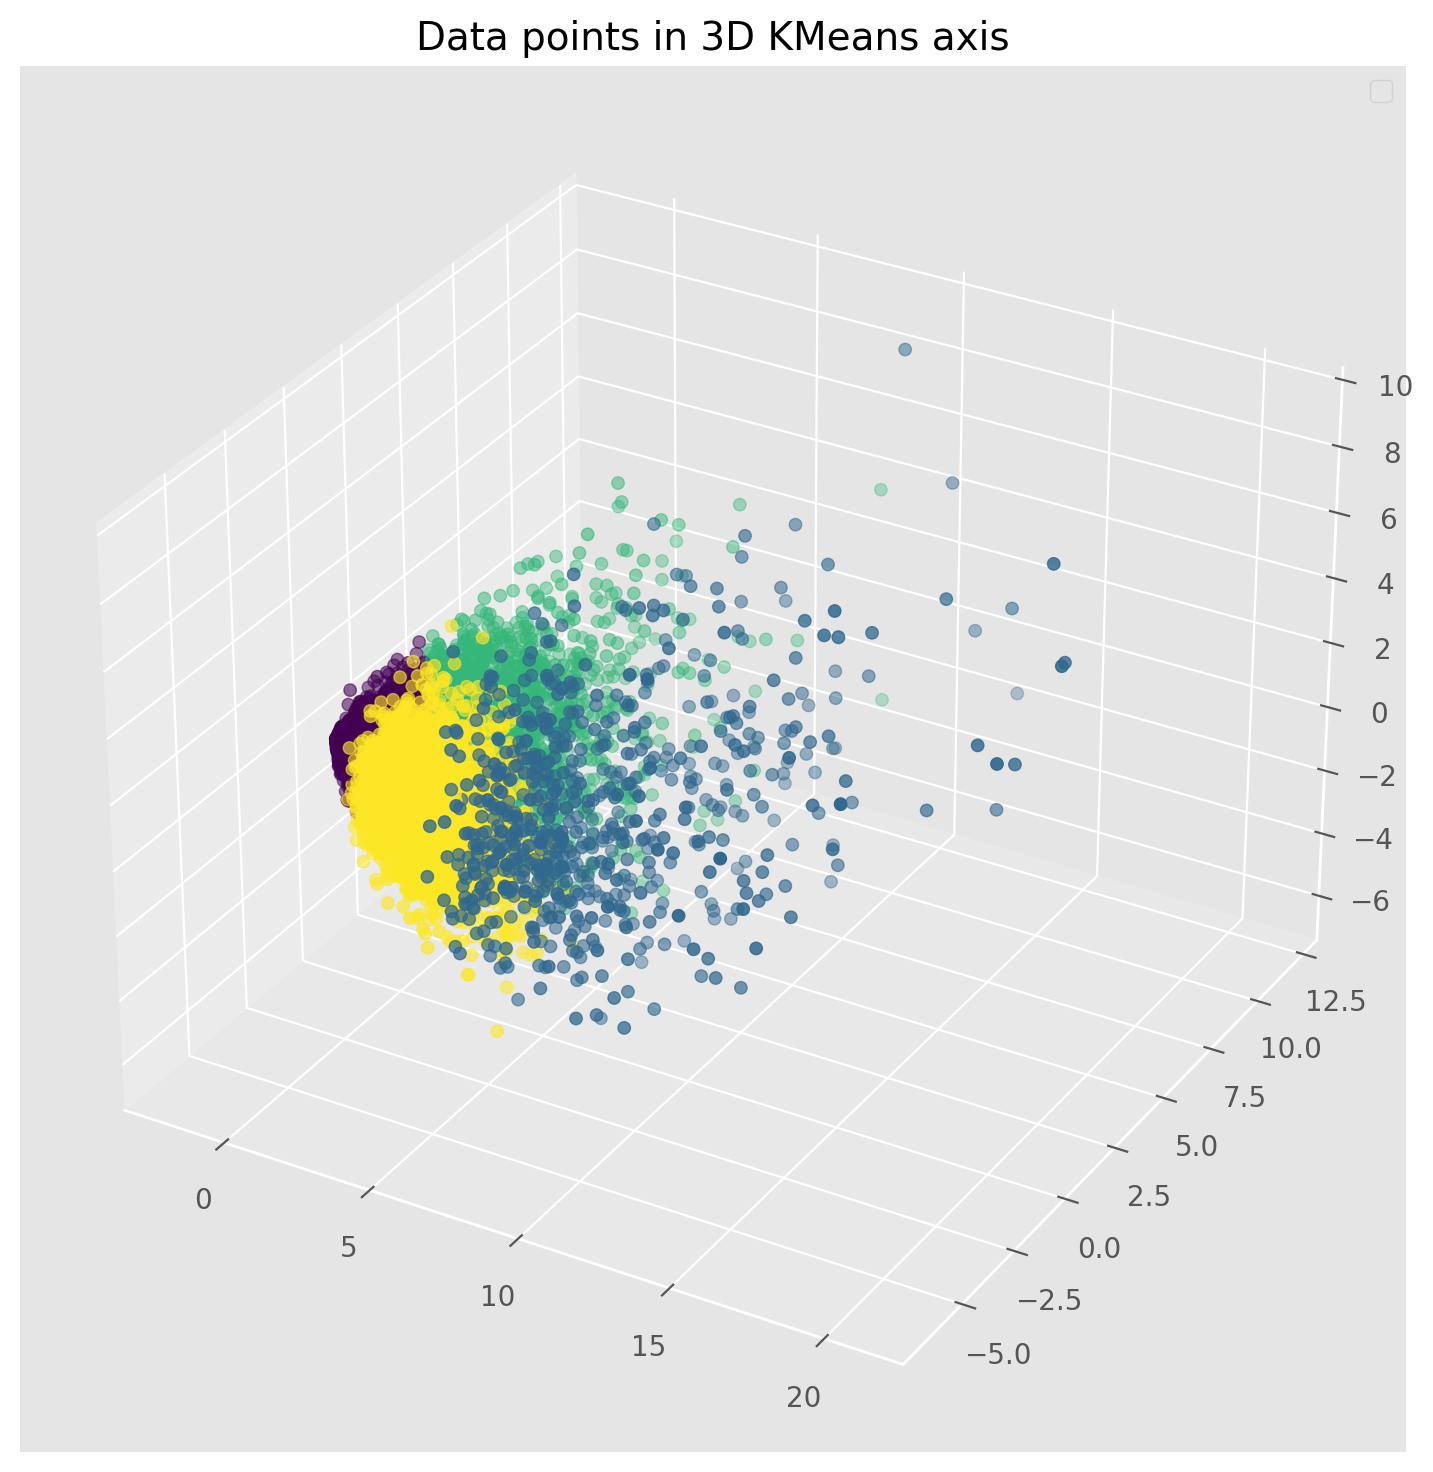

In [31]:
fig = plt.figure()
ax=plt.axes(projection="3d")
ax.scatter(tocluster[0], tocluster[1], tocluster[2],c=cluster_preds)

plt.title('Data points in 3D KMeans axis', fontsize=14)
plt.show()

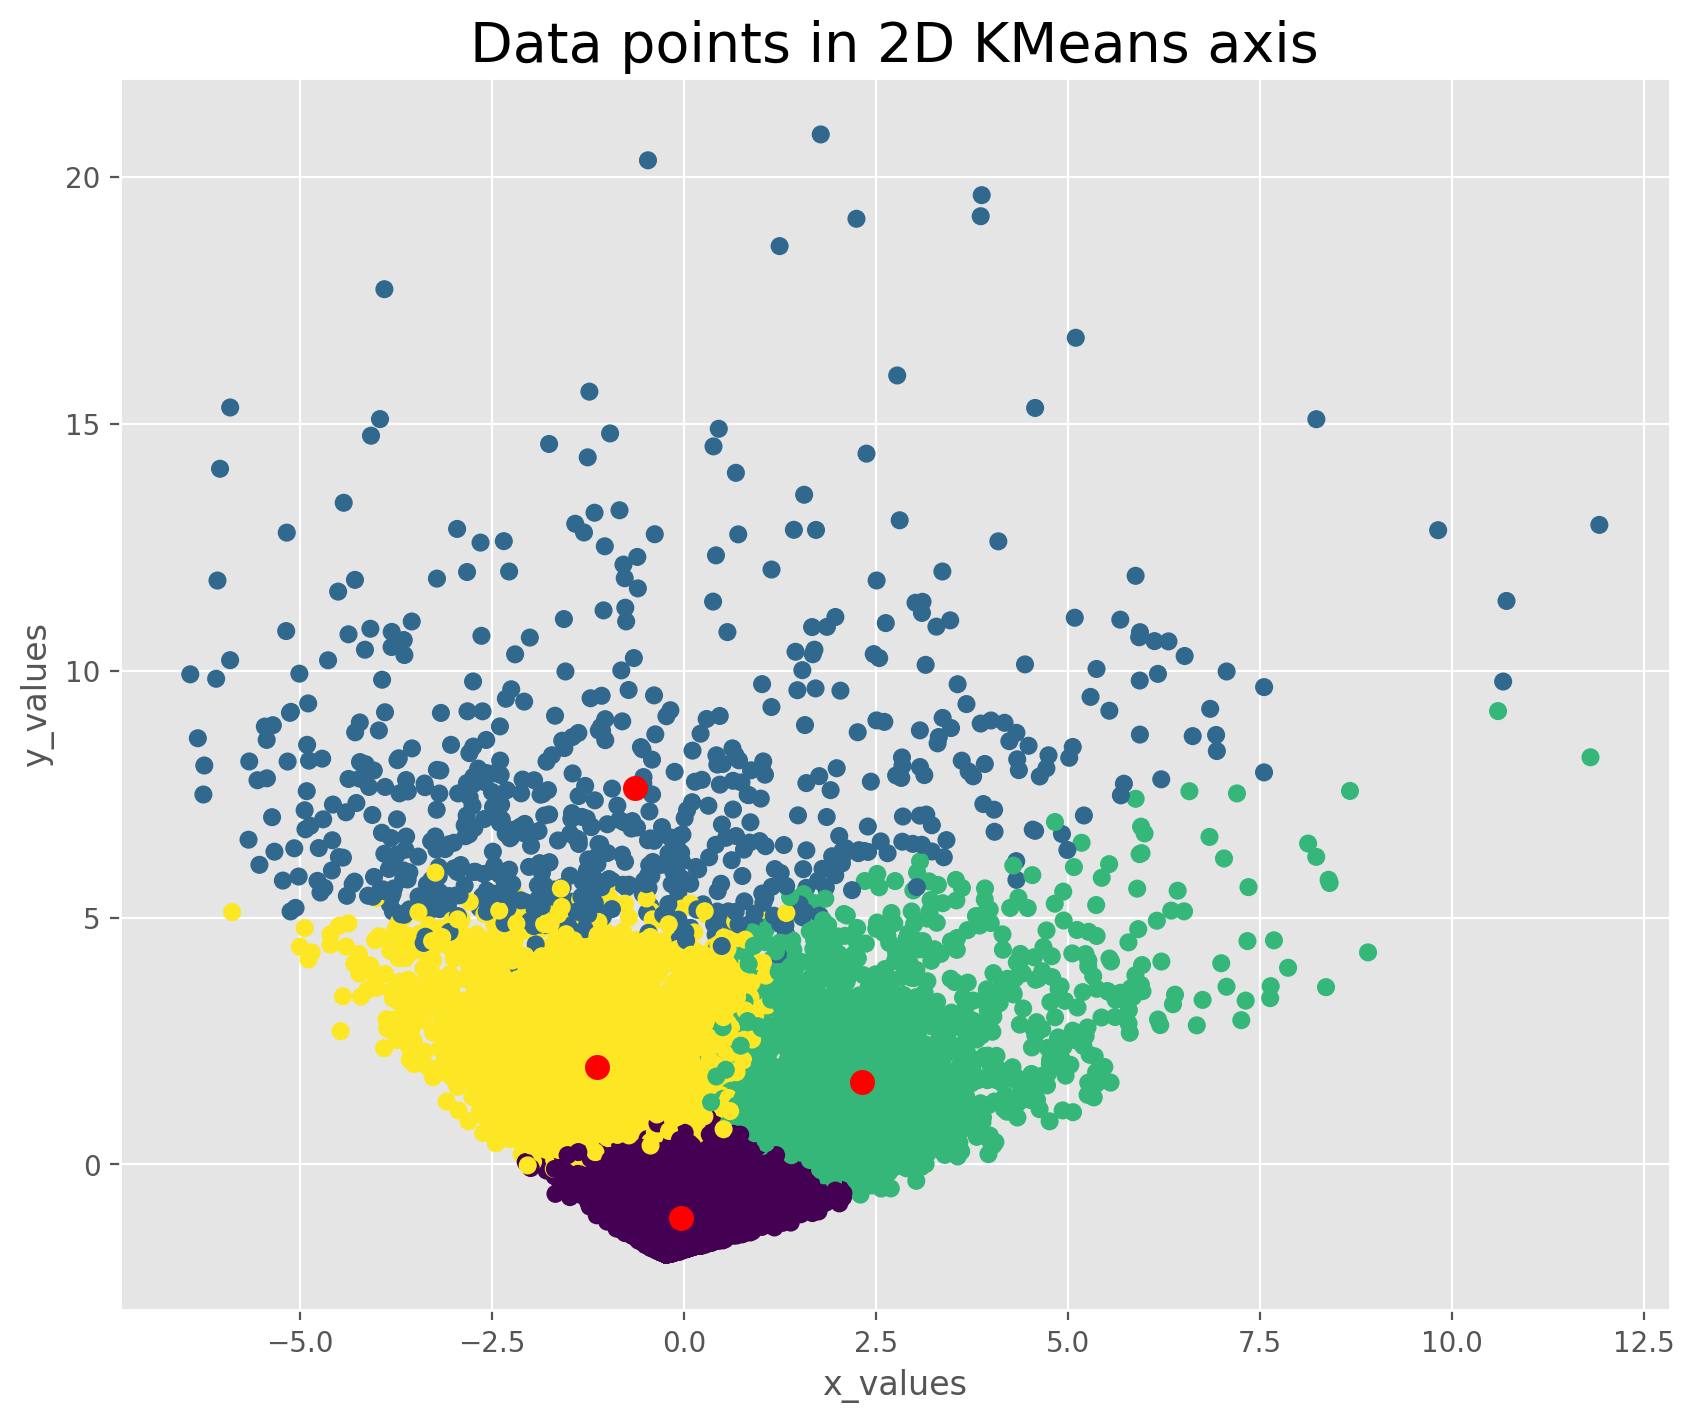

In [48]:
fig=plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c=cluster_preds)
for ci,c in enumerate(cluster_centers):
    plt.plot(c[1], c[0],'o',markersize=8,color='red',alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D KMeans axis', fontsize=20)
plt.show()

In [33]:
#在uer_anime這個表新增一個cluster欄位存放分群預測的結果
user_anime['cluster']=cluster_preds
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 觀察每個集群

In [34]:
cluster0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
cluster1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
cluster2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
cluster3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [35]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [36]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1

    #轉換列表中的字典以按頻率對關鍵字進行排序
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [37]:
animelist = list(cluster0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [38]:
set_keywords = set()
for list_keywords in data['genre'].str.split(',').values:
    if isinstance(list_keywords, float): continue  #只有在列表=NaN的情況下才會發生
    set_keywords = set_keywords.union(list_keywords)

In [39]:
def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)

    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Cluster 0

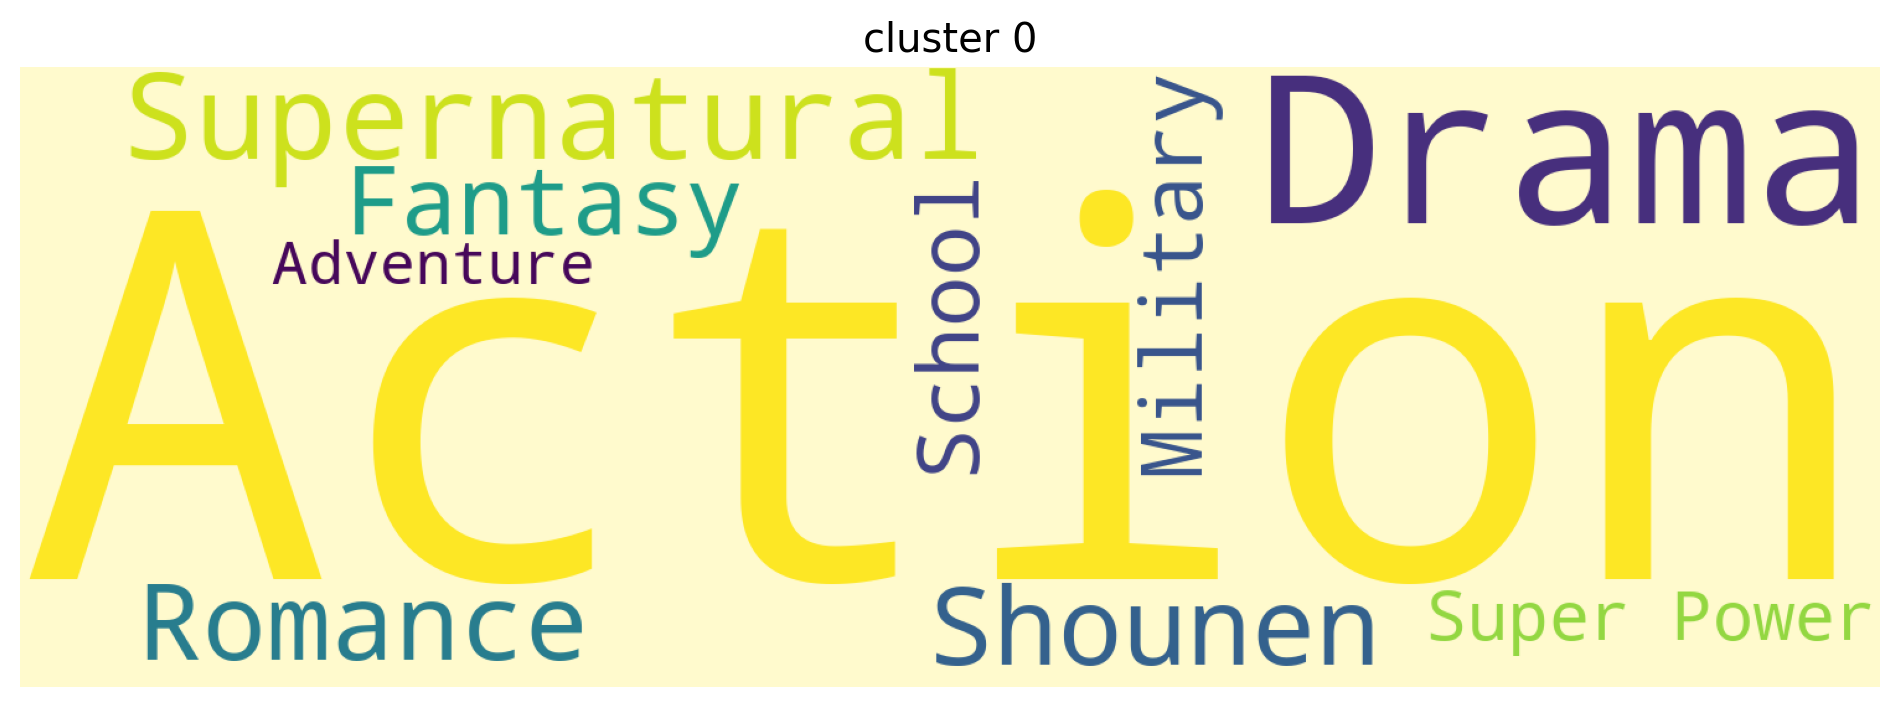

In [40]:
cluster0_animelist = list(cluster0.sort_values(ascending=False)[0:15].index)
cluster0_data = pd.DataFrame()
cluster0_data['genre'],cluster0_data['episode'],cluster0_data['rating'],cluster0_data['member'] =  createAnimeInfoList(cluster0_animelist)
cluster0_data.iloc[:,1:4] = cluster0_data.iloc[:,1:4].astype(int) # 將目標為數字的都改為整數
keyword_occurences, dum = count_word(cluster0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [41]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(cluster0_data['episode'].mean(), cluster0_data['rating'].mean(),cluster0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


### Cluster 1

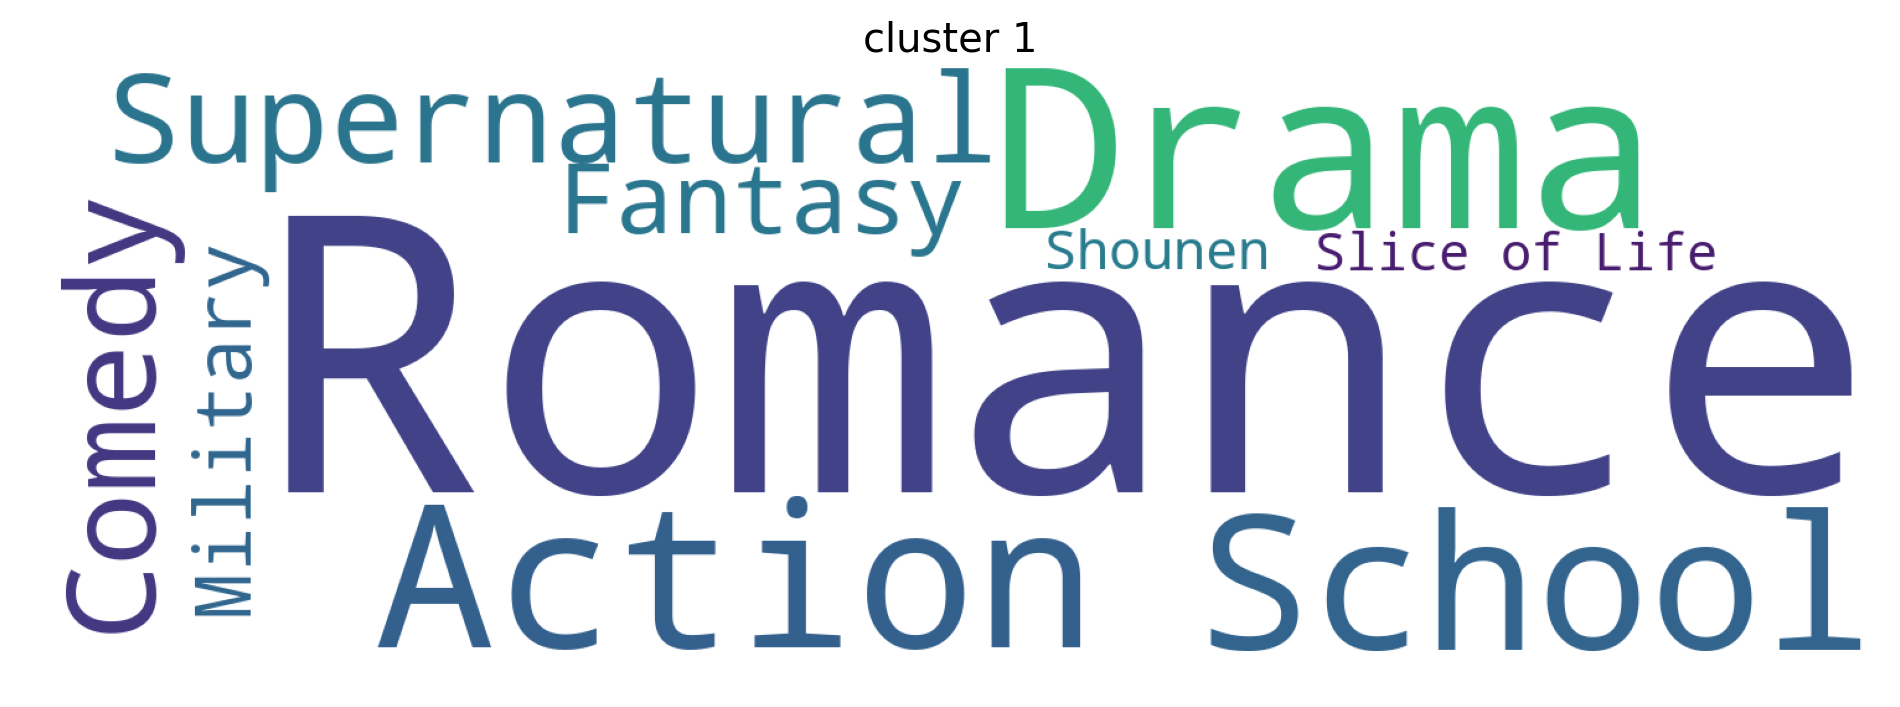

In [42]:
cluster1_animelist = list(cluster1.sort_values(ascending=False)[0:15].index)
cluster1_data = pd.DataFrame()
cluster1_data['genre'],cluster1_data['episode'],cluster1_data['rating'],cluster1_data['member'] =  createAnimeInfoList(cluster1_animelist)
cluster1_data.iloc[:,1:4] = cluster1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(cluster1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [43]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(cluster1_data['episode'].mean(), cluster1_data['rating'].mean(),cluster1_data['member'].mean()))

cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


### Cluster 2

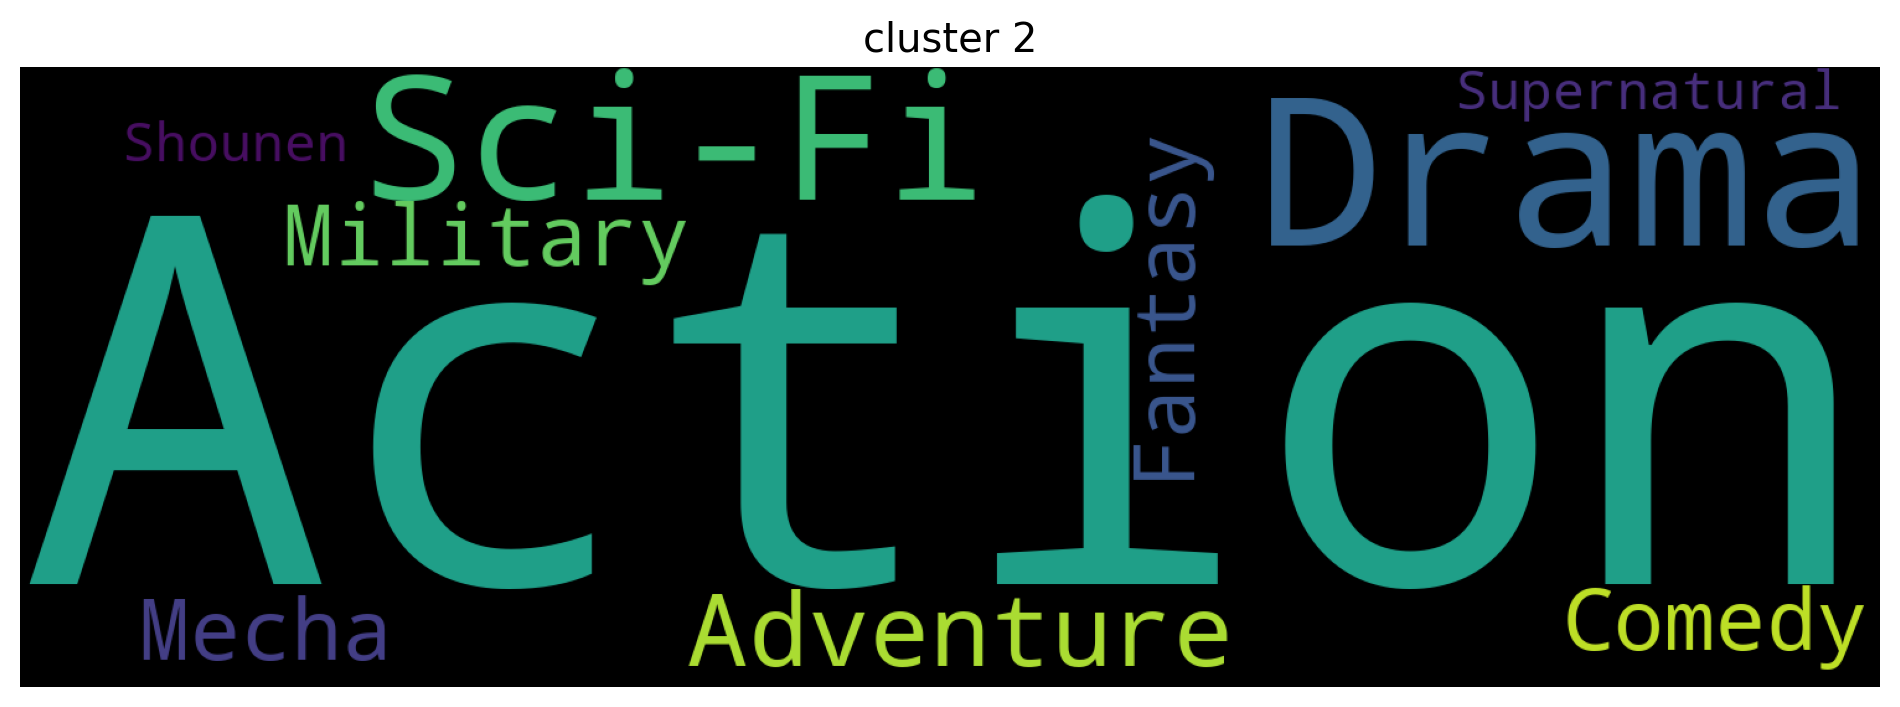

In [44]:
cluster2_animelist = list(cluster2.sort_values(ascending=False)[0:15].index)
cluster2_data = pd.DataFrame()
cluster2_data['genre'],cluster2_data['episode'],cluster2_data['rating'],cluster2_data['member'] =  createAnimeInfoList(cluster2_animelist)
cluster2_data.iloc[:,1:4] = cluster2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(cluster2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [45]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(cluster2_data['episode'].mean(), cluster2_data['rating'].mean(),cluster2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


### Cluster 3

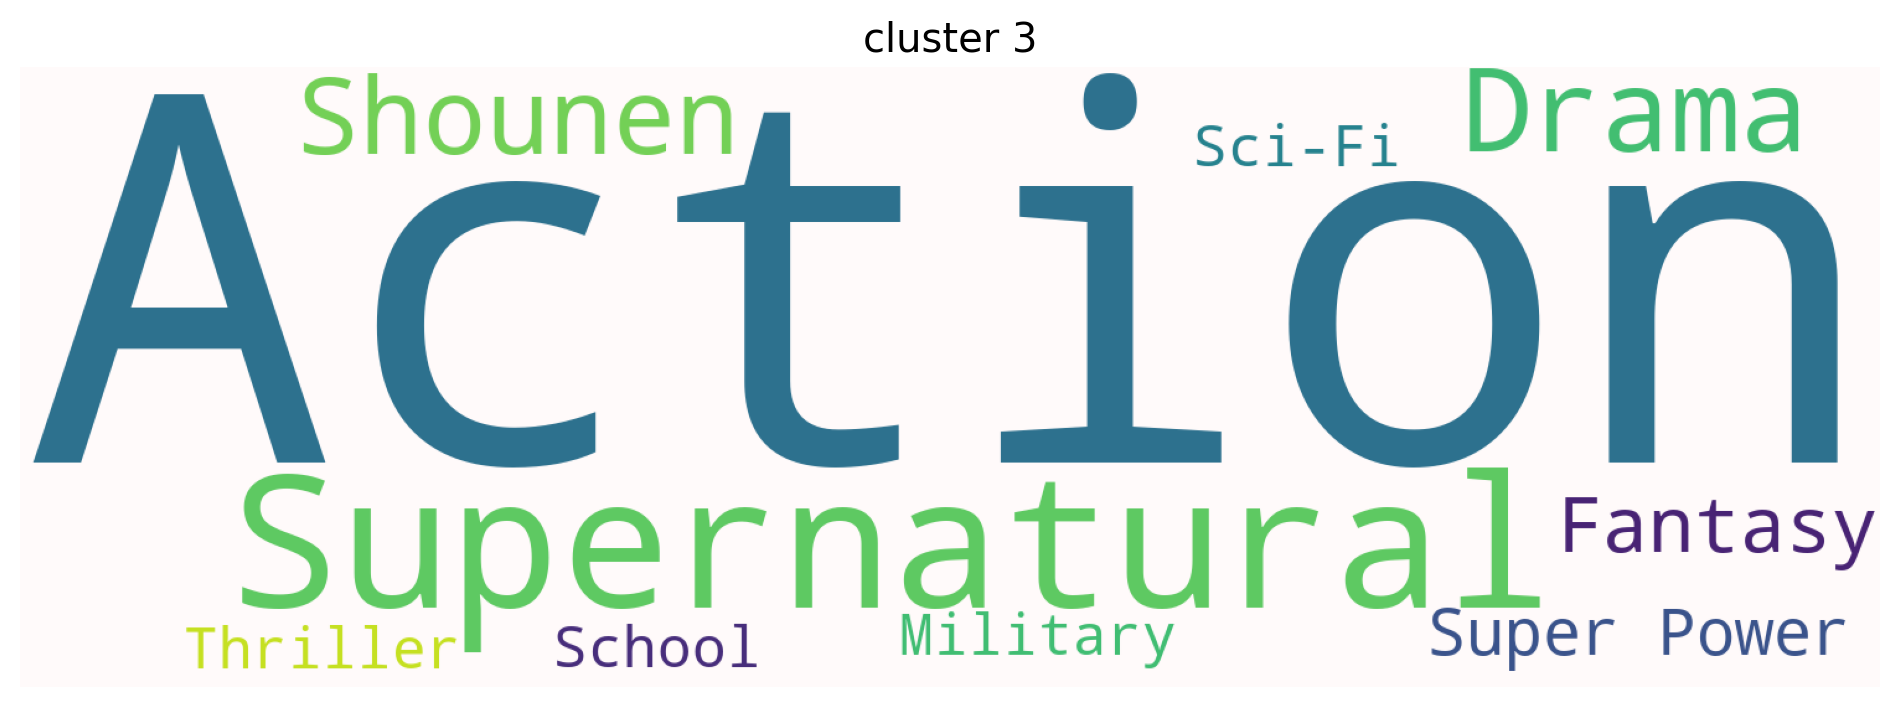

In [46]:
cluster3_animelist = list(cluster3.sort_values(ascending=False)[0:15].index)
cluster3_data = pd.DataFrame()
cluster3_data['genre'],cluster3_data['episode'],cluster3_data['rating'],cluster3_data['member'] =  createAnimeInfoList(cluster3_animelist)
cluster3_data.iloc[:,1:4] = cluster3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(cluster3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [47]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(cluster3_data['episode'].mean(), cluster3_data['rating'].mean(),cluster3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2
